In [70]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.patches import Patch

In [2]:
#get the data sets
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [3]:
#drop the empty column at the beginning
train_df = train_df.drop('Unnamed: 0',axis = 1)
test_df = test_df.drop('Unnamed: 0',axis = 1)

In [4]:
#make the categorical columns into numeric
train_df_encoded = pd.get_dummies(train_df, columns=['language',	'emotion',	'gender'])
test_df_encoded = pd.get_dummies(test_df, columns=['language',	'emotion',	'gender'])


In [5]:
#remove unneeded columns and set y column
columns = [column for column in train_df_encoded.columns if 'file_name' != column and 'duration' != column and 'emotion_' not in column ]
pred_column = 'emotion_SAD'


In [8]:
#In case we want to try the model on a new language, we need to remove language as a feature for modeling as we wouldn't know the "correction factor" forthat language ahead of time.
droplist_incllang= ['file_name']+[column for column in train_df_encoded.columns if 'emotion_' in column]+[column for column in train_df_encoded.columns if 'language_' in column]

In [9]:
#Separate out the prediction column. Remove the text column (can't standardize text) as well as the coded emotions.
droplist_base= ['file_name']+[column for column in train_df_encoded.columns if 'emotion_' in column]

Xtrain = train_df_encoded.drop(droplist_base, axis=1)
Ytrain = train_df_encoded[pred_column]

Xtest = test_df_encoded.drop(droplist_base,  axis=1)
Ytest = test_df_encoded[pred_column]

#Scale the predictors
scaler = StandardScaler()
Xtrain_scaled_array = scaler.fit_transform(Xtrain)
Xtest_scaled_array = scaler.fit_transform(Xtest)

#Put them back into a dataframe for use
Xtrain_scaled = pd.DataFrame(Xtrain_scaled_array, columns=Xtrain.columns)
Xtest_scaled = pd.DataFrame(Xtest_scaled_array, columns=Xtest.columns)

Logistic Regression

In [19]:
#set up scoring function
scorer = make_scorer(average_precision_score, needs_proba=True)

# Define the model
model = LogisticRegression(penalty='l1', random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#Find the estimators
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer, verbose=5)


In [20]:
grid_search.fit(Xtrain_scaled, Ytrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.931 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.924 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.895 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.942 total time=   0.0s
[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.939 total time=   0.0s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...............C=0.01, solver=saga;, score=0.931 total time=   0.8s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...............C=0.01, solver=saga;, score=0.917 total time=   0.8s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...............C=0.01, solver=saga;, score=0.887 total time=   0.8s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...............C=0.01, solver=saga;, score=0.940 total time=   0.8s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...............C=0.01, solver=saga;, score=0.933 total time=   0.9s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.965 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear;, score=0.967 total time=   0.0s
[CV 3/5] END ...........C=0.1, solver=liblinear;, score=0.970 total time=   0.0s
[CV 4/5] END ...........C=0.1, solver=liblinear;, score=0.978 total time=   0.0s
[CV 5/5] END ...........C=0.1, solver=liblinear;, score=0.979 total time=   0.0s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=0.1, solver=saga;, score=0.959 total time=   0.9s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=0.1, solver=saga;, score=0.955 total time=   0.9s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=0.1, solver=saga;, score=0.966 total time=   0.9s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=0.1, solver=saga;, score=0.975 total time=   1.0s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=0.1, solver=saga;, score=0.972 total time=   0.9s
[CV 1/5] END .............C=1, solver=liblinear;, score=0.917 total time=   0.3s
[CV 2/5] END .............C=1, solver=liblinear;, score=0.926 total time=   0.2s
[CV 3/5] END .............C=1, solver=liblinear;, score=0.928 total time=   0.3s
[CV 4/5] END .............C=1, solver=liblinear;, score=0.960 total time=   0.2s
[CV 5/5] END .............C=1, solver=liblinear;, score=0.956 total time=   0.2s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..................C=1, solver=saga;, score=0.937 total time=   0.9s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..................C=1, solver=saga;, score=0.933 total time=   0.9s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..................C=1, solver=saga;, score=0.958 total time=   0.9s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..................C=1, solver=saga;, score=0.968 total time=   0.9s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..................C=1, solver=saga;, score=0.966 total time=   0.9s
[CV 1/5] END ............C=10, solver=liblinear;, score=0.892 total time=   0.8s
[CV 2/5] END ............C=10, solver=liblinear;, score=0.876 total time=   2.3s
[CV 3/5] END ............C=10, solver=liblinear;, score=0.833 total time=   1.2s
[CV 4/5] END ............C=10, solver=liblinear;, score=0.904 total time=   3.4s
[CV 5/5] END ............C=10, solver=liblinear;, score=0.919 total time=   2.0s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=10, solver=saga;, score=0.936 total time=   1.0s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=10, solver=saga;, score=0.930 total time=   1.1s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=10, solver=saga;, score=0.956 total time=   1.1s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=10, solver=saga;, score=0.966 total time=   1.0s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=10, solver=saga;, score=0.964 total time=   1.0s
[CV 1/5] END ...........C=100, solver=liblinear;, score=0.893 total time=   0.8s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...........C=100, solver=liblinear;, score=0.822 total time= 2.1min


C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...........C=100, solver=liblinear;, score=0.871 total time= 2.0min
[CV 4/5] END ...........C=100, solver=liblinear;, score=0.899 total time=   1.4s
[CV 5/5] END ...........C=100, solver=liblinear;, score=0.904 total time=   1.7s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=100, solver=saga;, score=0.936 total time=   4.1s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=100, solver=saga;, score=0.930 total time=   1.3s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=100, solver=saga;, score=0.956 total time=   1.2s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=100, solver=saga;, score=0.965 total time=   1.3s
[CV 5/5] END ................C=100, solver=saga;, score=0.964 total time=   1.2s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(penalty='l1', random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(average_precision_score, needs_proba=True),
             verbose=5)

In [21]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation score: 0.97


In [23]:
best_model = grid_search.best_estimator_

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')


In [14]:
# Predict test data
y_pred = best_model.predict(Xtest_scaled)

# Evaluate the model
print("Test Accuracy:", accuracy_score(Ytest, y_pred))
print("Classification Report:\n", classification_report(Ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Ytest, y_pred))

Test Accuracy: 0.9109311740890689
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       167
           1       0.86      0.86      0.86        80

    accuracy                           0.91       247
   macro avg       0.90      0.90      0.90       247
weighted avg       0.91      0.91      0.91       247

Confusion Matrix:
 [[156  11]
 [ 11  69]]


In [15]:
y_pred_prob = best_model.predict_proba(Xtest_scaled)

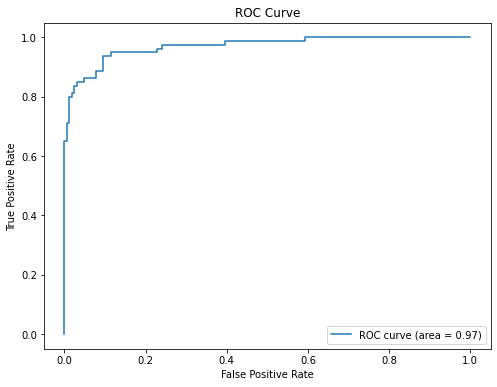

In [16]:
#Make ROC Curve
fpr, tpr, thresholds = roc_curve(Ytest, y_pred_prob[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(test_df_encoded[pred_column], y_pred_prob[:, 1]):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [58]:
#Find features with non-0 betas

#get full list of features and their coefficients
features = Xtest_scaled.columns
coefficients = best_model.coef_.flatten()
fulllist= pd.DataFrame(np.transpose([features, coefficients]))
#remove rows with 0 as a coefficient
shortlist = fulllist[fulllist[1] != 0]
#show how many features were not kicked out of the model:
print(len(shortlist))

92


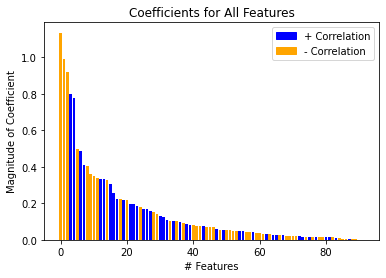

In [71]:
#sort and plot the coefficients
coef_sorted = shortlist.reindex(shortlist[1].abs().sort_values(ascending=False).index)
coef_sorted['Abs_Coef'] = coef_sorted[1].abs()

#look at all of them to get their distribution
colors = ['blue' if val >= 0 else 'orange' for val in coef_sorted[1]]
plt.bar(range(len(coef_sorted[0])), coef_sorted['Abs_Coef'], color=colors)
#plt.bar(coef_sorted[0], coef_sorted['Abs_Coef'], color=colors)
plt.xlabel('# Features')
plt.ylabel('Magnitude of Coefficient')
plt.title('Coefficients for All Features')

legend_labels = [Patch(color='blue', label='+ Correlation'),
                 Patch(color='orange', label='- Correlation')]
plt.legend(handles=legend_labels)

plt.show()

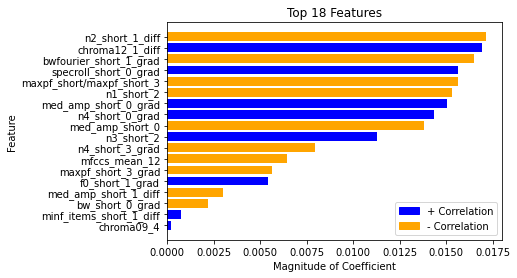

In [82]:
#look at just the top few of them to get their distribution
numtop = 18
coef_sorted = coef_sorted.iloc[::-1]

colors = ['blue' if val >= 0 else 'orange' for val in coef_sorted[1]]
plt.barh(coef_sorted[0][0:numtop], coef_sorted['Abs_Coef'][0:numtop], color=colors)

plt.ylabel('Feature')
plt.xlabel('Magnitude of Coefficient')
plt.title('Top ' + str(numtop) + ' Features')

legend_labels = [Patch(color='blue', label='+ Correlation'),
                 Patch(color='orange', label='- Correlation')]
plt.legend(handles=legend_labels)

plt.show()

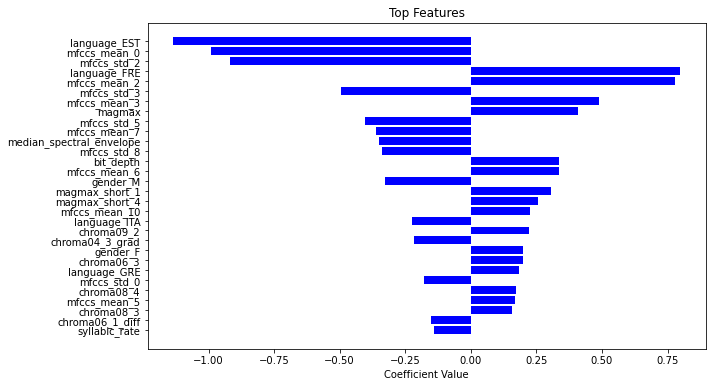

In [78]:
indices = np.argsort(np.abs(coefficients))[-30:]

plt.figure(figsize=(10, 6))
plt.title('Top Features')
plt.barh(range(len(indices)), coefficients[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.show()

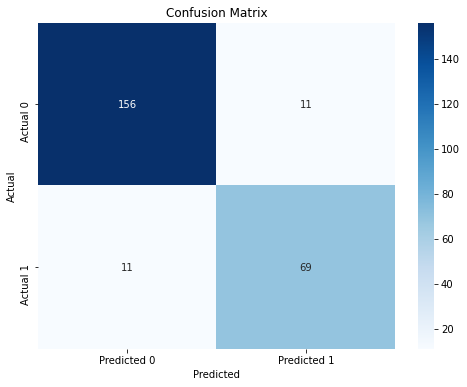

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined
cm = confusion_matrix(Ytest, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()